## Dataset 불러오기

In [1]:
import pandas as pd

train = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/주차수요 예측 ai/dataset/train.csv")
test = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/주차수요 예측 ai/dataset/test.csv")
age_gender = pd.read_csv("C:/Users/hu612/Desktop/School/sooda/주차수요 예측 ai/dataset/age_gender_info.csv")

In [2]:
train.shape

(2952, 15)

## Columns명 변경 : 지하철, 버스

In [3]:
train.columns

Index(['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '등록차량수'],
      dtype='object')

In [4]:
train.columns = ['단지코드', '총세대수', '임대건물구분', '지역', '공급유형', '전용면적', '전용면적별세대수', '공가수',
       '자격유형', '임대보증금', '임대료', '지하철',
       '버스', '단지내주차면수', '등록차량수']

## 임대보증금, 임대료 문자열 0으로 변경

In [5]:
train.loc[train['임대보증금'] == "-",'임대보증금'] = 0

In [6]:
train.loc[train['임대료'] == "-",'임대료'] = 0

## float -> int 변환 : 전용면적, 단지내주차면수, 등록차량수, 공가수

나중에 임대보증금 임대료도 null값 다 채우고 int 변환

In [7]:
# 전용면적 평수 변환
train['전용면적']=round(train['전용면적']*0.3025,0)

In [8]:
train[['전용면적','공가수','단지내주차면수','등록차량수']] = train[['전용면적','공가수','단지내주차면수','등록차량수']].astype(int)

## 버스 null값 4개 처리

In [9]:
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         211
버스            4
단지내주차면수       0
등록차량수         0
dtype: int64

In [10]:
# 버스 null값 아파트가 양산에 있다고 추정
# 근처 버스정류장을 새어보니 2개가 있었고
# 양산은 지하철이 도로를 다니지 않기 때문에 0개를 넣음
train.loc[train['버스'].isnull(),['지하철','버스']] = [0,2]

In [11]:
# 클린
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철         207
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

## 지하철 null값 0으로 채워주기


광역시에 지하철이 많이 다니기 때문에 광역시를 제외한 시,도에는 0을 채워주었다.
그러고 광역시끼리 해서 평균을 계산해봤을때, 0.xx가 나와서 null값을 0으로 채워주기로 하였다.

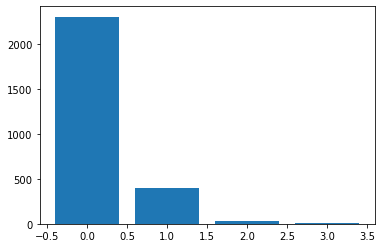

In [12]:
import matplotlib.pyplot as plt
x = [0,1,2,3]
y = [2306,400,33,6] # nan:230

plt.bar(x,y)
plt.show()

In [13]:
train['지하철'].fillna(0, inplace=True) 

## 총세대수 != sum(전용면적별세대수)

In [14]:
# 총세대수와 전용면적별세대수의 합이 다르기 때문에
# 어떤 단지코드가 다른지 알아보기 위한 코드

code=train.groupby(['단지코드'])
code=code.agg({'총세대수':'mean','전용면적별세대수':'sum'}).reset_index()
diff=[]
for i in range(len(code)):
    if code['총세대수'][i]!=code['전용면적별세대수'][i]:
        diff.append(code['단지코드'][i])
print(diff)  
len(diff)

['C1024', 'C1068', 'C1156', 'C1206', 'C1218', 'C1312', 'C1344', 'C1424', 'C1490', 'C1584', 'C1695', 'C1732', 'C1740', 'C1804', 'C1850', 'C1894', 'C1910', 'C1925', 'C1970', 'C2013', 'C2139', 'C2142', 'C2156', 'C2186', 'C2225', 'C2245', 'C2298', 'C2319', 'C2362', 'C2405', 'C2433', 'C2453', 'C2470', 'C2508', 'C2520', 'C2549', 'C2556', 'C2568', 'C2620', 'C2644']


40

In [15]:
for i in diff:
    code[code['단지코드']==i]

총세대수 - 분양, 임대<br>
전용면적별세대수 - 임대를 포함시킨다.

합의 차이가 1 나는 경우 대부분 상가가 분양된 경우가 많다.

In [16]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,12,134,38,A,15667000,103680,0.0,3.0,1425,1015
1,C2483,900,아파트,경상북도,국민임대,12,15,38,A,15667000,103680,0.0,3.0,1425,1015
2,C2483,900,아파트,경상북도,국민임대,16,385,38,A,27304000,184330,0.0,3.0,1425,1015
3,C2483,900,아파트,경상북도,국민임대,16,15,38,A,27304000,184330,0.0,3.0,1425,1015
4,C2483,900,아파트,경상북도,국민임대,16,41,38,A,27304000,184330,0.0,3.0,1425,1015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,15,19,7,A,11346000,116090,0.0,1.0,166,146
2948,C2532,239,아파트,강원도,국민임대,15,34,7,A,14005000,142310,0.0,1.0,166,146
2949,C2532,239,아파트,강원도,국민임대,16,34,7,A,14005000,142310,0.0,1.0,166,146
2950,C2532,239,아파트,강원도,국민임대,16,114,7,A,14005000,142310,0.0,1.0,166,146


### train 지역별 빈칸 결측치 확인 및 결측치 제외 평균 살펴보기

In [20]:
train['지역'].unique()

array(['경상북도', '경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도',
       '부산광역시', '제주특별자치도', '울산광역시', '충청북도', '전라남도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

In [36]:
df = train[(train['지역']=="경상북도") & (train['임대건물구분']=='아파트')]

In [49]:
df[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [48]:
# 임대보증금이랑 임대료 전부 object형
df['임대보증금'].astype('int32').mean()

19863428.57142857

In [50]:
df1 = train[(train['지역']=="경상북도") & (train['임대건물구분']=='상가')]
df1[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [51]:
df = train[(train['지역']=="경상남도") & (train['임대건물구분']=='아파트')]
df[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [58]:
df1 = train[(train['지역']=="경상남도") & (train['임대건물구분']=='상가')]
df1[['임대보증금','임대료']].isnull().sum()

임대보증금    97
임대료      97
dtype: int64

In [59]:
df1.shape

(97, 15)

In [73]:
df4 = train[(train['지역']=="대전광역시") & (train['임대건물구분']=='아파트')]
#df4[['임대보증금','임대료']].isnull().sum()

In [78]:
df4 = df4.dropna(axis=0)

In [79]:
df4['임대보증금'].astype('int32').mean()

23559582.19178082

In [80]:
df4['임대료'].astype('int32').mean()

173557.80821917808

In [86]:
df5 = train[(train['지역']=="대전광역시") & (train['임대건물구분']=='상가')]
df5[['임대보증금','임대료']].isnull().sum()

임대보증금    113
임대료      113
dtype: int64

In [82]:
df5 = df5.dropna(axis=0)
print(df5['임대보증금'].astype('int32').mean())
print(df5['임대료'].astype('int32').mean())

nan
nan


In [83]:
df5['임대보증금'].unique()

array([], dtype=object)

In [84]:
df5['임대료'].unique()

array([], dtype=object)

In [85]:
df5

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수


In [88]:
df6 = train[(train['지역']=="경기도") & (train['임대건물구분']=='아파트')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [89]:
df6 = train[(train['지역']=="경기도") & (train['임대건물구분']=='상가')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [90]:
df6 = train[(train['지역']=="전라북도") & (train['임대건물구분']=='아파트')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [91]:
df6 = train[(train['지역']=="전라북도") & (train['임대건물구분']=='상가')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [92]:
df6 = train[(train['지역']=="강원도") & (train['임대건물구분']=='아파트')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [93]:
df6 = train[(train['지역']=="강원도") & (train['임대건물구분']=='상가')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    31
임대료      31
dtype: int64

In [94]:
df6 = df6.dropna(axis=0)
print(df6['임대보증금'].astype('int32').mean())
print(df6['임대료'].astype('int32').mean())

nan
nan


In [95]:
df6 = train[(train['지역']=="광주광역시") & (train['임대건물구분']=='아파트')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [96]:
df6 = train[(train['지역']=="광주광역시") & (train['임대건물구분']=='상가')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [97]:
df6 = train[(train['지역']=="충청남도") & (train['임대건물구분']=='아파트')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [100]:
df6 = train[(train['지역']=="충청남도") & (train['임대건물구분']=='상가')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    76
임대료      76
dtype: int64

In [102]:
df6 = df6.dropna(axis=0)
#print(df6['임대보증금'].astype('int32').mean())
#print(df6['임대료'].astype('int32').mean())

In [103]:
df6

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수


In [104]:
df6 = train[(train['지역']=="부산광역시") & (train['임대건물구분']=='아파트')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    0
임대료      0
dtype: int64

In [108]:
df6 = train[(train['지역']=="부산광역시") & (train['임대건물구분']=='상가')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    220
임대료      220
dtype: int64

In [109]:
df6

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
371,C2135,1116,상가,부산광역시,임대상가,4,1,10,D,NaN,NaN,1.0,3.0,262,127
372,C2135,1116,상가,부산광역시,임대상가,6,1,10,D,NaN,NaN,1.0,3.0,262,127
373,C2135,1116,상가,부산광역시,임대상가,6,1,10,D,NaN,NaN,1.0,3.0,262,127
374,C2135,1116,상가,부산광역시,임대상가,6,1,10,D,NaN,NaN,1.0,3.0,262,127
375,C2135,1116,상가,부산광역시,임대상가,6,1,10,D,NaN,NaN,1.0,3.0,262,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,C1439,1755,상가,부산광역시,임대상가,12,1,29,D,NaN,NaN,1.0,3.0,270,172
613,C1439,1755,상가,부산광역시,임대상가,12,1,29,D,NaN,NaN,1.0,3.0,270,172
614,C1439,1755,상가,부산광역시,임대상가,19,1,29,D,NaN,NaN,1.0,3.0,270,172
615,C1439,1755,상가,부산광역시,임대상가,122,1,29,D,NaN,NaN,1.0,3.0,270,172


In [106]:
df6 = df6.dropna(axis=0)
print(df6['임대보증금'].astype('int32').mean())
print(df6['임대료'].astype('int32').mean())

nan
nan


In [138]:
df = train[train['지역']=='대구광역시']

In [139]:
df['임대건물구분'].unique()

array(['아파트'], dtype=object)

In [122]:
df6 = train[(train['지역']=="부산광역시") & (train['임대건물구분']=='상가')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    220
임대료      220
dtype: int64

In [123]:
df6

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,지하철,버스,단지내주차면수,등록차량수
371,C2135,1116,상가,부산광역시,임대상가,4,1,10,D,NaN,NaN,1.0,3.0,262,127
372,C2135,1116,상가,부산광역시,임대상가,6,1,10,D,NaN,NaN,1.0,3.0,262,127
373,C2135,1116,상가,부산광역시,임대상가,6,1,10,D,NaN,NaN,1.0,3.0,262,127
374,C2135,1116,상가,부산광역시,임대상가,6,1,10,D,NaN,NaN,1.0,3.0,262,127
375,C2135,1116,상가,부산광역시,임대상가,6,1,10,D,NaN,NaN,1.0,3.0,262,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,C1439,1755,상가,부산광역시,임대상가,12,1,29,D,NaN,NaN,1.0,3.0,270,172
613,C1439,1755,상가,부산광역시,임대상가,12,1,29,D,NaN,NaN,1.0,3.0,270,172
614,C1439,1755,상가,부산광역시,임대상가,19,1,29,D,NaN,NaN,1.0,3.0,270,172
615,C1439,1755,상가,부산광역시,임대상가,122,1,29,D,NaN,NaN,1.0,3.0,270,172


In [113]:
print(df6['임대보증금'].astype('int32').mean())

nan


In [114]:
print(df6['임대료'].astype('int32').mean())

nan


### 데이터 오류 수정

In [140]:
a=train[train['단지코드'].isin(['C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988'])].index
b=train[train['단지코드'].isin(['C2335', 'C1327'])].index
train.drop(a,inplace=True)
test.drop(b,inplace=True)

In [143]:
df6 = train[(train['지역']=="대전광역시") & (train['임대건물구분']=='아파트')]
df6[['임대보증금','임대료']].isnull().sum()

임대보증금    7
임대료      7
dtype: int64

In [145]:
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       569
임대료         569
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

In [157]:
df = train[(train['지역']=="대전광역시") & (train['임대건물구분']=='아파트')]
df[['임대보증금','임대료']].isna()

,임대보증금,임대료
15,False,False
16,False,False
17,False,False
18,False,False
19,False,False
...,...,...
2835,False,False
2836,False,False
2837,False,False
2838,False,False


### 대전광역시 아파트 임대보증금,임대료, 행 평균으로 채우기

In [159]:
train.loc[(train['임대건물구분'] == "아파트")&(train['지역']=='대전광역시'),'임대보증금'] = 23559582
train.loc[(train['임대건물구분'] == "아파트")&(train['지역']=='대전광역시'),'임대료'] = 173558

In [160]:
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       562
임대료         562
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

부산 상가 임대료 : 492000<br>
경남 상가 임대료: 229500<br>
제주 상가 임대료: 66500<br>
대전 상가 임대료: 98000<br>
강원도 상가 임대료: 137500<br>
충남 상가 임대료: 175500<br>

In [165]:
train1 = train.dropna(axis=0)
train1 = train1[['임대보증금','임대료']].astype('int32')
train1[['임대보증금','임대료']]

,임대보증금,임대료
8,9216000,82940
9,12672000,107130
10,12672000,107130
11,18433000,149760
12,18433000,149760
...,...,...
2947,11346000,116090
2948,14005000,142310
2949,14005000,142310
2950,14005000,142310


In [169]:
df6 = train[(train['지역']=="서울특별시") & (train['임대건물구분']=='아파트')]
df6[['임대료']].astype('int32').mean()

임대료    369625.9375
dtype: float64

### 상가 임대료 2020년 지역별 임대료 평균으로 채워넣기

제주도, 경상남도, 대전광역시, 강원도, 충청남도, 부산광역시

In [172]:
#데이터불러오기
imdae= pd.read_csv('imdae.csv',encoding='cp949')
imdae.drop(['2020(3)'],axis=1,inplace=True)
imdae


#부산 상가 임대료
busan=imdae[imdae['지역'].str.contains('부산')] 
busan

busan1=round(busan['2020(1)'].sum(),0)
busan2=round(busan['2020(2)'].sum(),0)

busanim=int((busan1+busan2)/2 * 1000)
busanim


#경남 상가 임대료
namdo=imdae[imdae['지역'].str.contains('경남')] 
namdo

namdo1=round(namdo['2020(1)'].sum(),0)
namdo2=round(namdo['2020(2)'].sum(),0)

namdoim=int((namdo1+namdo2)/2 *1000)
namdoim


#제주 상가 임대료
jeju=imdae[imdae['지역'].str.contains('제주')] 
jeju

jeju1=round(jeju['2020(1)'].sum(),0)
jeju2=round(jeju['2020(2)'].sum(),0)

jejuim=int((jeju1+jeju2)/2 *1000)
jejuim


# 대전 상가 임대료
dajun=imdae[imdae['지역'].str.contains('대전')] 
dajun

dajun1=round(dajun['2020(1)'].sum(),0)
dajun2=round(dajun['2020(2)'].sum(),0)

dajunim=int((dajun1+dajun2)/2 * 1000)
dajunim


# 강원도 상가 임대료
kang=imdae[imdae['지역'].str.contains('강원')] 
kang

kang1=round(kang['2020(1)'].sum(),0)
kang2=round(kang['2020(2)'].sum(),0)

kangim=int((kang1+kang2)/2 * 1000)
kangim


# 충청남도 상가 임대료
chung=imdae[imdae['지역'].str.contains('충남')] 
chung

chung1=round(chung['2020(1)'].sum(),0)
chung2=round(chung['2020(2)'].sum(),0)

chungim=int((chung1+chung2)/2 * 1000)
chungim

175500

In [173]:
train.loc[(train['임대건물구분'] == "상가")&(train['지역']=='강원도'),'임대료'] = kangim
train.loc[(train['임대건물구분'] == "상가")&(train['지역']=='부산광역시'),'임대료'] = busanim
train.loc[(train['임대건물구분'] == "상가")&(train['지역']=='경상남도'),'임대료'] = namdoim
train.loc[(train['임대건물구분'] == "상가")&(train['지역']=='제주특별자치도'),'임대료'] = jejuim
train.loc[(train['임대건물구분'] == "상가")&(train['지역']=='충청남도'),'임대료'] = chungim
train.loc[(train['임대건물구분'] == "상가")&(train['지역']=='대전광역시'),'임대료'] = dajunim

In [174]:
train.isnull().sum()

단지코드          0
총세대수          0
임대건물구분        0
지역            0
공급유형          0
전용면적          0
전용면적별세대수      0
공가수           0
자격유형          0
임대보증금       562
임대료           0
지하철           0
버스            0
단지내주차면수       0
등록차량수         0
dtype: int64

## 임대건물구분이 상가면 임대보증금이 전부 nan이니 상관없을거 같아서 0으로 채우기로 함

In [175]:
df11 = train[train['임대건물구분']=='상가']

In [177]:
df11['임대보증금'].unique()

array([nan], dtype=object)

In [178]:
train.loc[train['임대건물구분'] == "상가",'임대보증금'] = 0

In [179]:
train.isnull().sum()

단지코드        0
총세대수        0
임대건물구분      0
지역          0
공급유형        0
전용면적        0
전용면적별세대수    0
공가수         0
자격유형        0
임대보증금       0
임대료         0
지하철         0
버스          0
단지내주차면수     0
등록차량수       0
dtype: int64

다음 시간에 할 거 (수 1시)

1. 마지막 데이터 전처리
2. 회귀 모델 하나씩 공부하기